In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random
from wordcloud import WordCloud
import nltk
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
!curl --header "Host: doc-0g-7c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_q4032iqu1jsg9ockb0a98liqou2gs1kl_nonce=o9q1b79nrmbr8" --header "Connection: keep-alive" "https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ff4hud39uruli0nvn2uljqpvbthrca3k/jai4o4tpkbk347t1bgvetjdvf52jv045/1627983675000/05393963687578437339/05393963687578437339/18jWu3v305E5DwLHu2X2XHHl1Fgxsxs6w?e=download&authuser=0&nonce=o9q1b79nrmbr8&user=05393963687578437339&hash=1olpn7p9kttj2v9u9vusi0q3jpee4od3" -L -o "train.tsv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322M    0  322M    0     0   165M      0 --:--:--  0:00:01 --:--:--  165M


In [3]:
!curl --header "Host: doc-0k-7c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_q4032iqu1jsg9ockb0a98liqou2gs1kl=05393963687578437339|1627983675000|dptp6i7lv89v6c1kdss196v1ficqfb9r" --header "Connection: keep-alive" "https://doc-0k-7c-docs.googleusercontent.com/docs/securesc/ff4hud39uruli0nvn2uljqpvbthrca3k/fgic7183onlph9opsp6kic2knoiacge9/1627983675000/05393963687578437339/05393963687578437339/1jkiubC6xVWx77r8eN28ChdDcf4aF1qQu?e=download&authuser=0" -L -o "test.tsv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  147M    0  147M    0     0   161M      0 --:--:-- --:--:-- --:--:--  161M


In [4]:
data = pd.read_csv("train.tsv", sep= "\t")
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
data.shape

(1482535, 8)

- We have 8 columns and over 1.4 million data points in our train data set

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [7]:
data.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [9]:
test = pd.read_csv("test.tsv", sep = "\t")
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [10]:
test.shape

(693359, 7)

In [11]:
test.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


## Checking for null values in data

In [13]:
data.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [14]:
test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description     False
dtype: bool

In [15]:
submission_final= pd.DataFrame(test['test_id'])
submission_final.head(5)

,test_id
0,0
1,1
2,2
3,3
4,4


### Observation
- Category_name, brand_name and item_description have null values. So we are processing this coulumns

In [16]:
def filling_missing_data(data):
    data.category_name.fillna(value= "Other",inplace = True)
    data.brand_name.fillna(value= "Not known",inplace = True)
    data.item_description.fillna(value= "No discription given",inplace = True)
    return data  

In [17]:
train = filling_missing_data(data)

In [18]:
train.shape

(1482535, 8)

In [19]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity


In [20]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool

In [21]:
test = filling_missing_data(test)
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,Not known,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,Not known,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,Not known,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,Not known,1,Rediscovering life after the loss of a loved o...


In [22]:
test.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool

### Univariate Analysis
#### price

In [23]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

- The maximum price of an item is 2009 whereas minimun price is 0

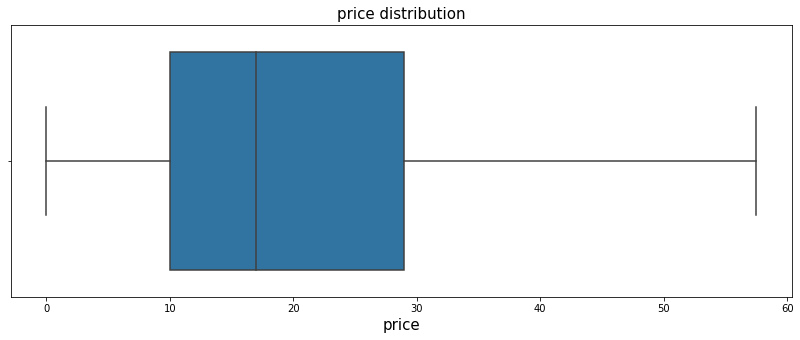

In [24]:
fig,ax = plt.subplots(figsize=(14,5))
plt.title("price distribution", fontsize = 15)
sns.boxplot(train.price, showfliers = False)
ax.set_xlabel('price',fontsize=15)
plt.show()

- we can clearly see that the price of items is in range 10 to 30.

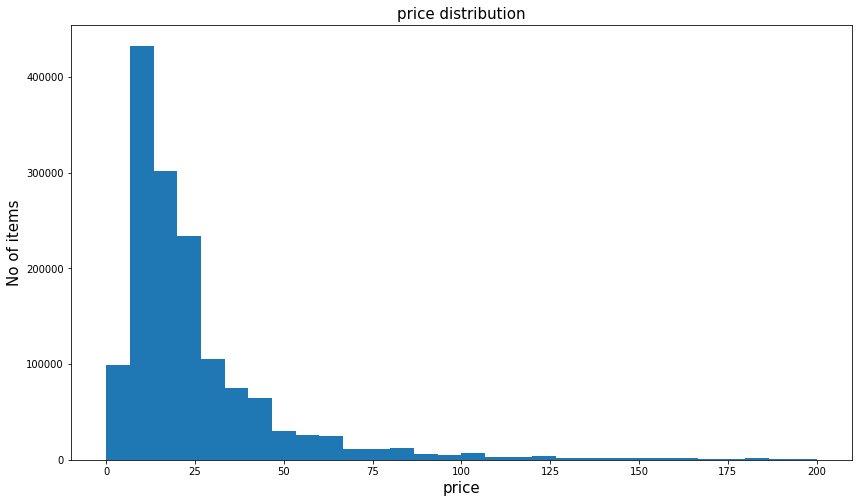

In [25]:
fig,ax = plt.subplots(figsize=(14,8))
ax.hist(train.price,bins=30,range=[0,200],label = "Price")
plt.title("price distribution", fontsize = 15)
ax.set_xlabel('price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.show()

- Histogram gives a better representation than box-plot. It reveals most of the items have their prices between 15-22.

In [26]:
train["logprice"] = np.log(train["price"]+1)

In [27]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662


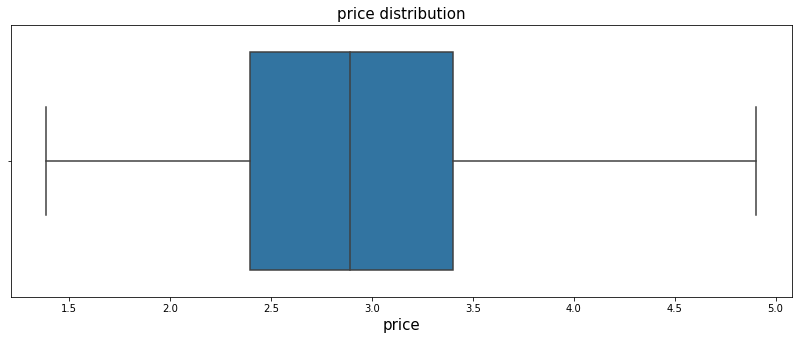

In [28]:
fig,ax = plt.subplots(figsize=(14,5))
plt.title("price distribution", fontsize = 15)
sns.boxplot(train.logprice, showfliers = False)
ax.set_xlabel('price',fontsize=15)
plt.show()

- We have scaled down our 'price' feature logprice. We have added log(Price+1) to it as log(0) is undefined. hence if price for an item is 0, then the item will have no price as defined.

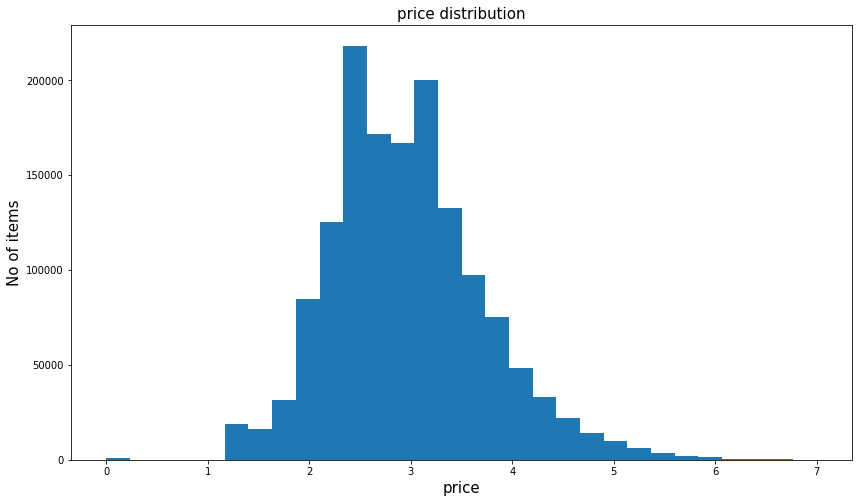

In [29]:
fig,ax = plt.subplots(figsize=(14,8))
ax.hist(train.logprice,bins=30,range=[0,7],label = "Price")
plt.title("price distribution", fontsize = 15)
ax.set_xlabel('price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.show()

- The 'log(price+1)' feature has the price range spread over 2.3-3.5 for most of the items

#### Shipping

In [30]:
print("0: shipping charges paid by seller")
print("1: shipping charges paid by buyers")
print("COUNT:\n ",train['shipping'].value_counts())
print("Fraction: \n",train['shipping'].value_counts(normalize=True))

0: shipping charges paid by seller
1: shipping charges paid by buyers
COUNT:
  0    819435
1    663100
Name: shipping, dtype: int64
Fraction: 
 0    0.552726
1    0.447274
Name: shipping, dtype: float64


In [31]:
seller_charged = []
buyer_charged = []
for i in tqdm(range(0,len(train['shipping']))):
    if train["shipping"][i]==0:
        seller_charged.append(train["logprice"][i])
    else:
        buyer_charged.append(train["logprice"][i])

100%|██████████| 1482535/1482535 [00:22<00:00, 65908.19it/s]


In [32]:
print("seller charged = ",len(seller_charged))
print("buyer charged = ",len(buyer_charged))

seller charged =  819435
buyer charged =  663100


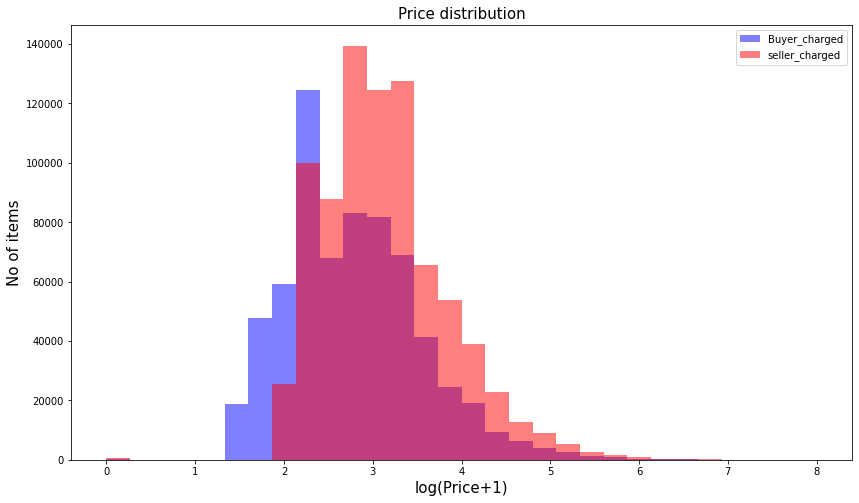

In [33]:
fig, ax = plt.subplots(figsize=(14,8))
ax.hist(buyer_charged,bins=30,range=[0,8],label="Buyer_charged",color='b',alpha=0.5)
ax.hist(seller_charged,bins=30,range=[0,8],label="seller_charged",color='r',alpha=0.5)
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('log(Price+1)',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend(loc='upper right')

plt.show()

- Here, we can see that for items which have lesser price, the shipping had to be paid by the buyer for profit reasons. Also, as the price increases, we can see that the shipping charges have been paid by the seller.. And there is a lot of overlap for items where both buyer and seller have been charged.

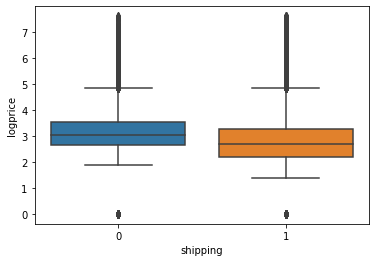

In [34]:
sns.boxplot(x=train.shipping,y=train.logprice,orient='v')

- Similar to our conclusions from the histogram plot, boxplot also reveals that when price increases, the seller is charged and vice-versa.

####  Item category

In [35]:
#Ref: https://stackoverflow.com/questions/12282232/how-do-i-count-unique-values-inside-a-list
print("No of unique values in item category is:",train['category_name'].nunique())

No of unique values in item category is: 1288


In [36]:
print("Top-10 unique category by frequency:\n\n",train['category_name'].value_counts()[:10])

Top-10 unique category by frequency:

 Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64


In [37]:
def cat_split(row):
    try:
        text = row
        text1, text2, text3 = text.split('/')
        return text1, text2, text3
    except:
        return ("Label not given", "Label not given", "Label not given")

In [38]:
train['general_cat'], train['subcat_1'], train['subcat_2'] = \
zip(*train['category_name'].apply(lambda x: cat_split(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice,general_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [39]:
test['general_cat'], test['subcat_1'], test['subcat_2'] = \
zip(*test['category_name'].apply(lambda x: cat_split(x)))
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,Not known,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,Not known,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,Not known,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,Not known,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [40]:
print("No of unique values in main category: ",train['general_cat'].nunique())
print("No of unique values in Sub_category1: ",train['subcat_1'].nunique())
print("No of unique values in Sub_category2: ",train['subcat_2'].nunique())

No of unique values in main category:  11
No of unique values in Sub_category1:  114
No of unique values in Sub_category2:  865


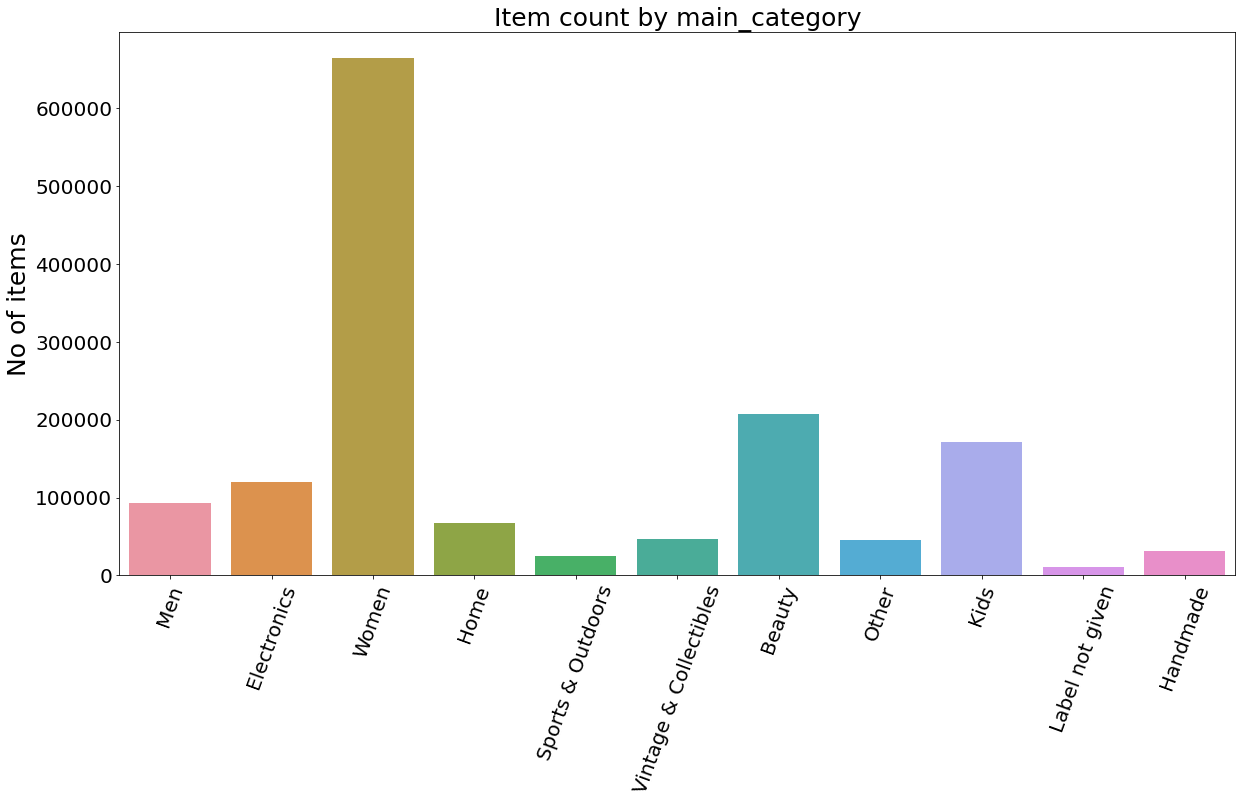

In [41]:
#Ref: https://seaborn.pydata.org/generated/seaborn.countplot.html
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='general_cat', data=train, ax=ax)
plt.title('Item count by main_category',fontsize=25)
plt.ylabel('No of items',fontsize=25)
plt.xlabel('')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)

plt.show()

- From this plot, we can conclude that items of women has the maximum number in main category.

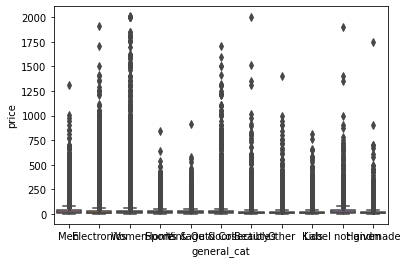

In [42]:
#Ref: http://www.datasciencemadesimple.com/box-plot-in-python/
sns.boxplot(x=train.general_cat,y=train.price,orient='v')

Top-10 subcategory_1:


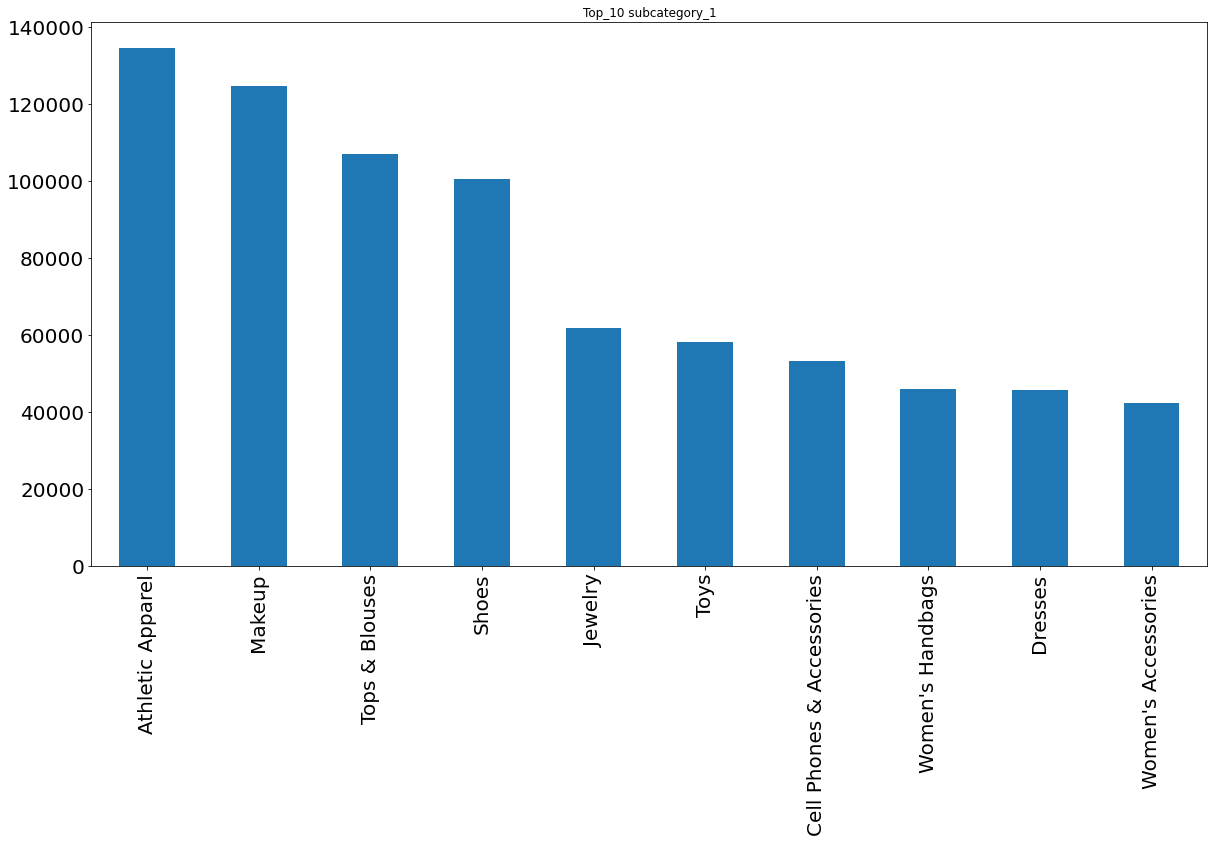

In [43]:
#Ref: https://stackoverflow.com/questions/48799185/plot-histogram-matplotlib-with-labels-on-x-axis-instead-of-count
print("Top-10 subcategory_1:")
train.subcat_1.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 subcategory_1",fontsize=20)

- Here, it lists the top 10 items with greatest frequencies in sub-category 1.

Top-10 subcategory_2:


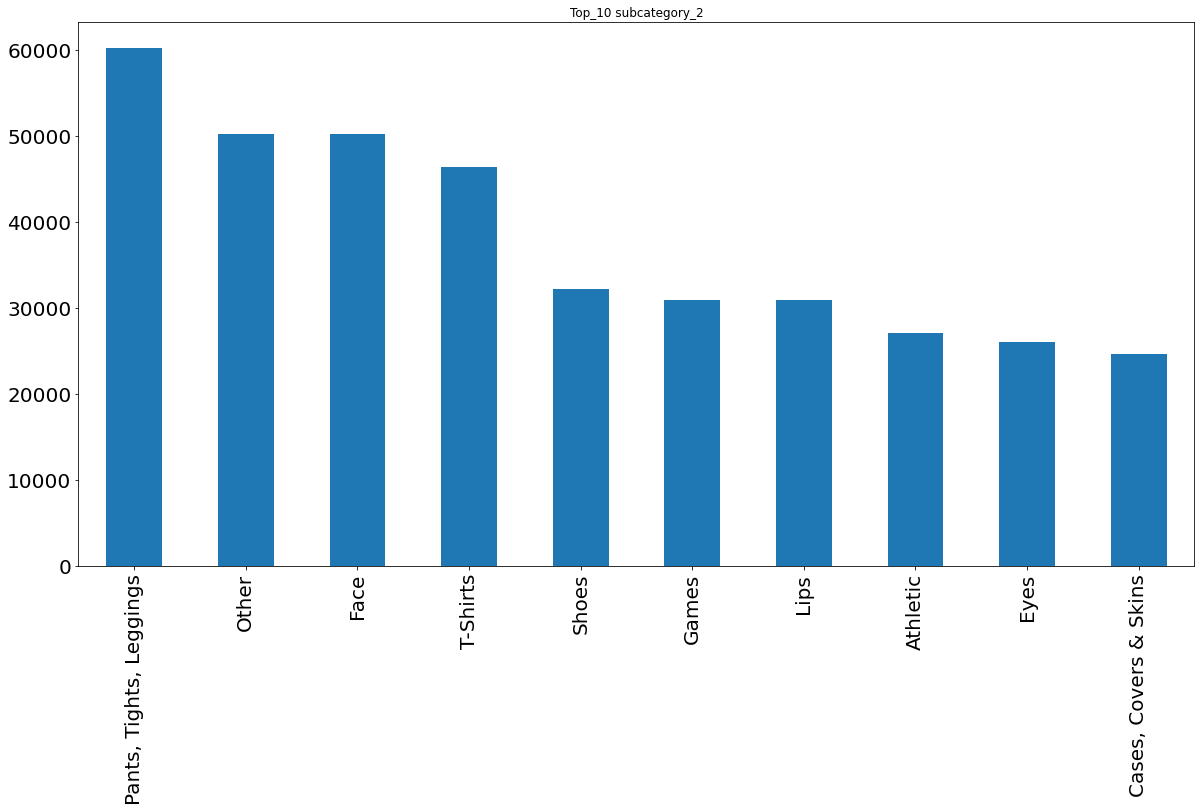

In [44]:
#Ref: https://stackoverflow.com/questions/48799185/plot-histogram-matplotlib-with-labels-on-x-axis-instead-of-count
print("Top-10 subcategory_2:")
train.subcat_2.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 subcategory_2",fontsize=20)

#### Brand name

In [45]:
print("No of unique brands: ",train['brand_name'].nunique())

No of unique brands:  4810


Top-10 brands by frequency of sale:


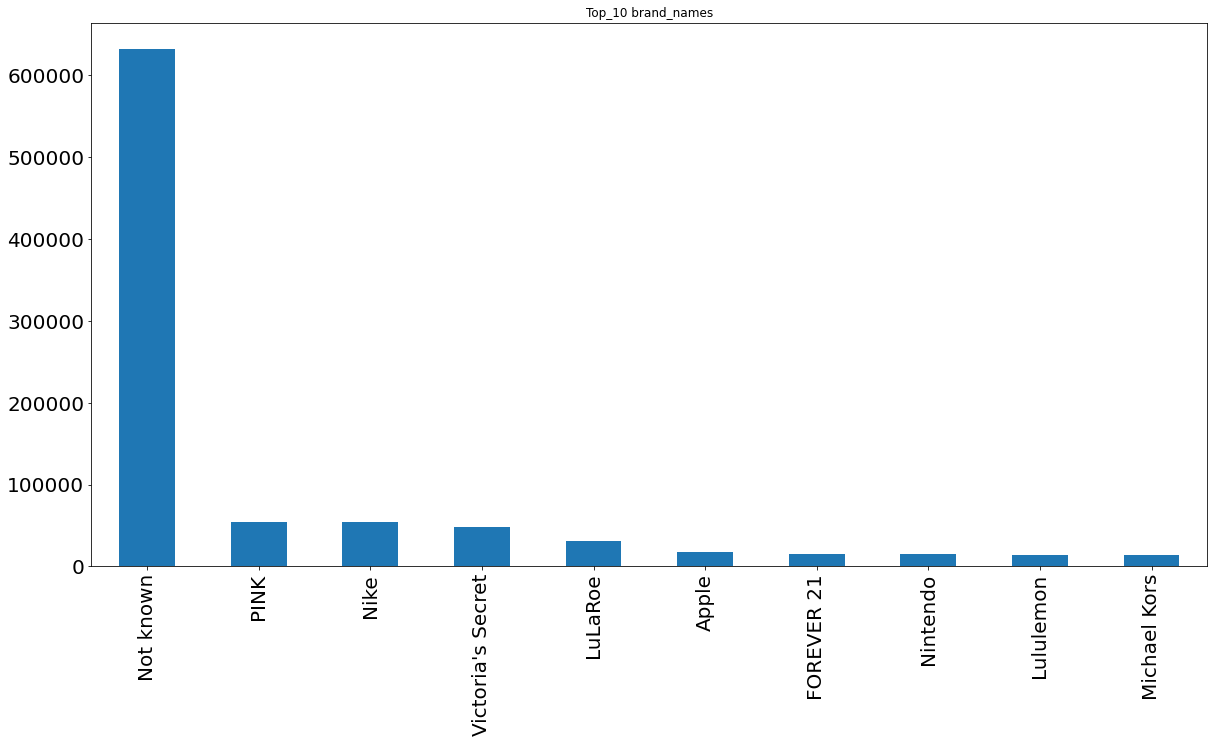

In [46]:
#Ref: https://stackoverflow.com/questions/48799185/plot-histogram-matplotlib-with-labels-on-x-axis-instead-of-count
print("Top-10 brands by frequency of sale:")
train.brand_name.value_counts()[:10].plot(kind = 'bar',figsize = (20,10), title="Top_10 brand_names",fontsize=20)

- For most of the items, the brand name has not been listed can be deduced from the plot. Second to it, most number of items have 'Pink' and "Nike" as brand names.

#### Item description

In [47]:
def length(description):
    count = 0
    for i in description.split():
        count += 1
    return count

In [48]:
lol = []
for i in train['item_description']:
    temp = []
    temp.append(i)
    temp.append(length(str(i)))
    lol.append(temp)

print(lol[0])
print(len(lol))

['No description yet', 3]
1482535


In [49]:
mydf = pd.DataFrame(lol,columns=['desc','desc_length'])
print(mydf.head(2))

                                                desc  desc_length
0                                 No description yet            3
1  This keyboard is in great condition and works ...           36


In [50]:
train['description_len'] = mydf['desc_length']

In [51]:
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice,general_cat,subcat_1,subcat_2,description_len
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,36
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse,29


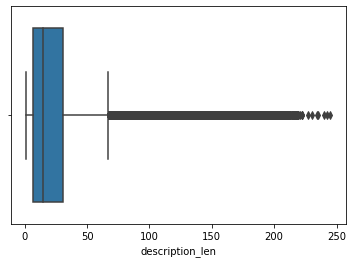

In [52]:
sns.boxplot(x=train.description_len)

- The box-plot of decsription length shows that most of the tiems have description length ranging between 15-40 words.

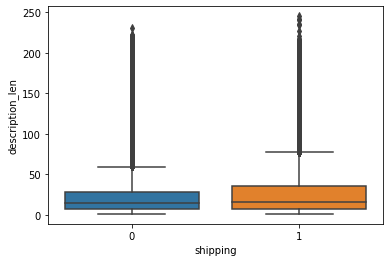

In [53]:
sns.boxplot(y=train.description_len,x=train.shipping)

Top-10 item_descriptions by frequency:


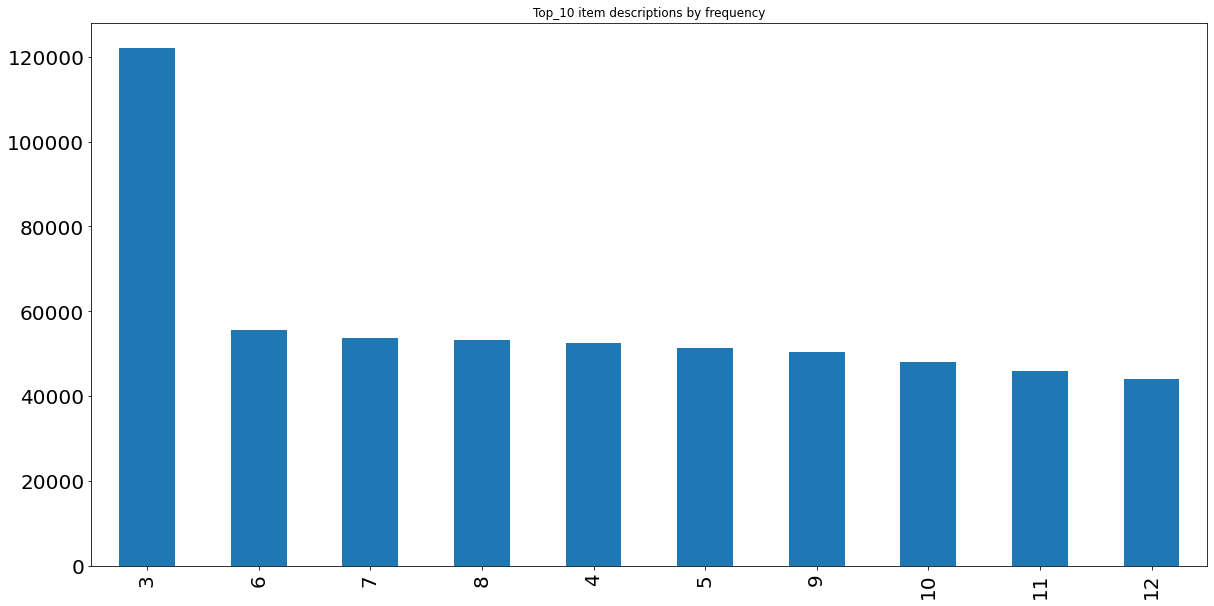

In [54]:
#Ref: https://stackoverflow.com/questions/48799185/plot-histogram-matplotlib-with-labels-on-x-axis-instead-of-count
print("Top-10 item_descriptions by frequency:")
train.description_len.value_counts()[:10].plot(kind = 'bar',figsize = (20,10),
                                               title="Top_10 item descriptions by frequency",fontsize=20)

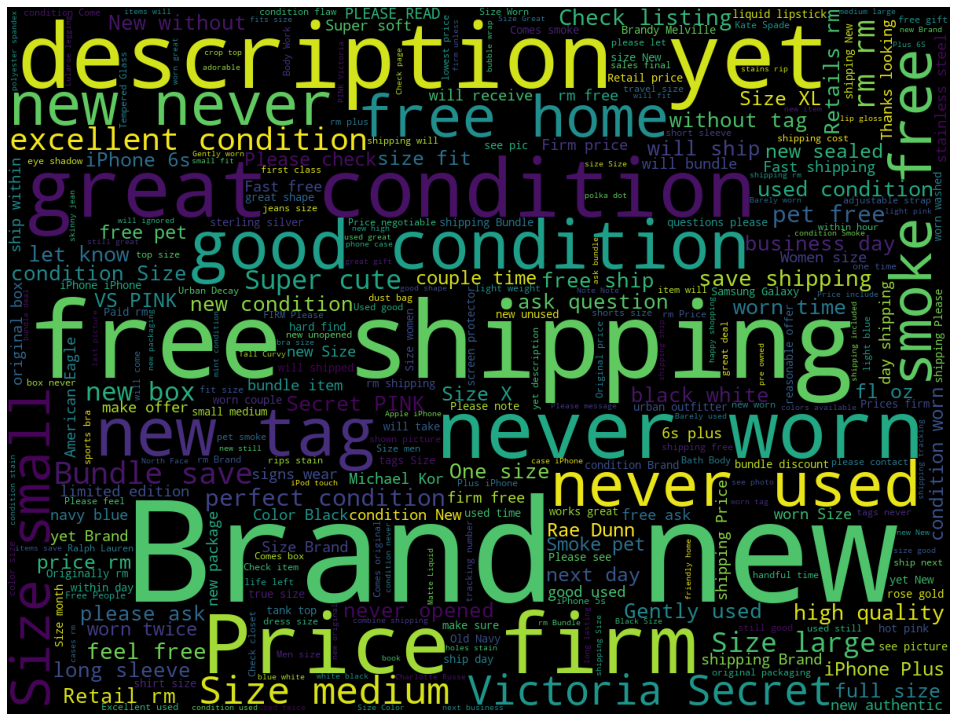

In [55]:
#Ref: https://www.kaggle.com/konohayui/mercari-price-suggestion-eda
wc = WordCloud(max_words=300,width = 1200, height = 900).generate(" ".join(train.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")
plt.show()

- This word cloud plot gives a good idea about the words that appear frequently in the item description field

#### Basic Feature Engineering and Preprocessing

In [56]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [57]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

#### Calculating sentiment score on item description as a feature

In [58]:
#for X_train
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_total_train = []
# tqdm is for printing the status bar
for sentance in tqdm(train['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_total_train.append(sent.lower().strip())

# after preprocesing
preprocessed_total_train[20000]

100%|██████████| 1482535/1482535 [02:25<00:00, 10204.95it/s]


'minor flaws check pic condition bundle save'

In [59]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

train_sentiment = []; 
for sentence in tqdm(preprocessed_total_train):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    train_sentiment.append(ss)

  0%|          | 0/1482535 [00:00<?, ?it/s]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


100%|██████████| 1482535/1482535 [07:15<00:00, 3406.79it/s]


In [60]:
negative=[]
neutral=[]
positive=[]
compounding=[]
for i in train_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        if(polarity=='compound'):
            compounding.append(score)

In [61]:
train['negative']=negative
train['neutral']=neutral
train['positive']=positive
train['compound']=compounding

#### Calculating Correlation between different features

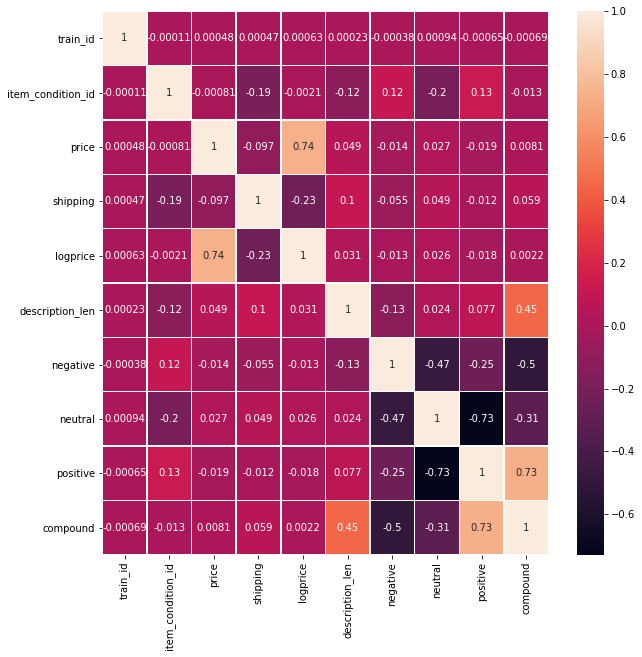

In [62]:
columns = list(train.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

1. We can see that description length has a fair correleation with the price of an item. Hence, we will include this as an additional feature in the features list.
2. Also, features of sentiment score share some correlation with the target variable 'Price'. Hence we are including sentiment score on item description as an additional feature

In [63]:
y_train = np.log(train["price"]+1)
train_ids = train['train_id'].values.astype(np.int32)
train.drop(['price', 'train_id','logprice','description_len','negative', 'neutral','positive','compound'], axis=1, inplace=True)

In [64]:
train.head(5)

,name,item_condition_id,category_name,brand_name,shipping,item_description,general_cat,subcat_1,subcat_2
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Not known,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Not known,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Not known,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [65]:
test_ids = test['test_id'].values.astype(np.int32)
test.drop(['test_id'], axis=1, inplace=True)

### Splitting the dataset into train and test

In [66]:
x=train 
y=y_train
df_train, df_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Preprocessing on train and test datasets

In [67]:
from tqdm import tqdm
preprocessed_train_des = []
# tqdm is for printing the status bar
for sentance in tqdm(df_train['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_train_des.append(sent.lower().strip())

# after preprocesing
preprocessed_train_des[20000]

100%|██████████| 1186028/1186028 [01:59<00:00, 9911.22it/s]


'brand new received gift opened box thinking would keep decided stick two faced setting powder'

In [68]:
from tqdm import tqdm
preprocessed_test_des = []
# tqdm is for printing the status bar
for sentance in tqdm(df_test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_test_des.append(sent.lower().strip())

# after preprocesing
preprocessed_test_des[20000]

100%|██████████| 296507/296507 [00:29<00:00, 10032.63it/s]


'three near mint erikas venusaur first edition holo'

In [69]:
from tqdm import tqdm
preprocessed_test = []
# tqdm is for printing the status bar
for sentance in tqdm(test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_test.append(sent.lower().strip())

# after preprocesing
preprocessed_test[20000]

100%|██████████| 693359/693359 [01:09<00:00, 9934.06it/s] 


'8 herbal essences gel'

In [70]:
from tqdm import tqdm
preprocessed_test2 = []
# tqdm is for printing the status bar
for sentance in tqdm(test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_test2.append(sent.lower().strip())

# after preprocesing
preprocessed_test2[20000]

100%|██████████| 693359/693359 [01:08<00:00, 10172.76it/s]


'8 herbal essences gel'

### Performing one-hot encoding on categorical features
#### Name

In [71]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_name = vectorizer.transform(df_train['name'].values)
test_name = vectorizer.transform(df_test['name'].values)


print("After vectorizations")
print(train_name.shape)
print(test_name.shape)

print(vectorizer.get_feature_names())

After vectorizations
(1186028, 15929)
(296507, 15929)
['00', '000', '001', '002', '003', '007', '007taz', '00g', '01', '02', '03', '04', '043', '045', '05', '06', '07', '08', '09', '0g', '0oz', '0r', '0s', '0x', '10', '100', '1000', '1001', '100ct', '100g', '100ml', '100pcs', '101', '102', '103', '104', '105', '106', '107', '108', '1080', '1080p', '109', '10c', '10ft', '10g', '10k', '10kt', '10lbs', '10m', '10ml', '10mm', '10oz', '10pairs', '10pc', '10pcs', '10pk', '10r', '10s', '10th', '10w', '10x', '10x13', '11', '110', '111', '112', '113', '114', '115', '11c', '11m', '11pc', '11r', '11s', '11w', '12', '120', '1200', '120gb', '122', '123', '1234', '124', '125', '127', '128', '128gb', '129', '12c', '12hr', '12k', '12m', '12mm', '12mo', '12month', '12months', '12oz', '12p', '12pc', '12pcs', '12r', '12s', '12th', '12v', '12w', '12x', '12x12', '12x15', '13', '130', '132', '135', '136', '13c', '13in', '13pc', '13s', '13th', '14', '140', '144', '1460', '149', '14g', '14k', '14kt', '14mm', 

In [72]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_name2 = vectorizer.transform(test['name'].values)



print("After vectorizations")
print(submission_name2.shape)


print(vectorizer.get_feature_names())

After vectorizations
(693359, 15929)
['00', '000', '001', '002', '003', '007', '007taz', '00g', '01', '02', '03', '04', '043', '045', '05', '06', '07', '08', '09', '0g', '0oz', '0r', '0s', '0x', '10', '100', '1000', '1001', '100ct', '100g', '100ml', '100pcs', '101', '102', '103', '104', '105', '106', '107', '108', '1080', '1080p', '109', '10c', '10ft', '10g', '10k', '10kt', '10lbs', '10m', '10ml', '10mm', '10oz', '10pairs', '10pc', '10pcs', '10pk', '10r', '10s', '10th', '10w', '10x', '10x13', '11', '110', '111', '112', '113', '114', '115', '11c', '11m', '11pc', '11r', '11s', '11w', '12', '120', '1200', '120gb', '122', '123', '1234', '124', '125', '127', '128', '128gb', '129', '12c', '12hr', '12k', '12m', '12mm', '12mo', '12month', '12months', '12oz', '12p', '12pc', '12pcs', '12r', '12s', '12th', '12v', '12w', '12x', '12x12', '12x15', '13', '130', '132', '135', '136', '13c', '13in', '13pc', '13s', '13th', '14', '140', '144', '1460', '149', '14g', '14k', '14kt', '14mm', '14oz', '14p', '1

### Brand Name

In [73]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['brand_name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_brandname = vectorizer.transform(df_train['brand_name'].values)
test_brandname = vectorizer.transform(df_test['brand_name'].values)


print("After vectorizations")
print(train_brandname.shape)
print(test_brandname.shape)

print(vectorizer.get_feature_names())

After vectorizations
(1186028, 4822)
(296507, 4822)
['05', '10', '11', '148', '191', '1960', '1981', '1byone', '1st', '21', '21men', '24', '2b', '2k', '2xu', '3m', '40', '44', '47', '525', '5th', '66', '72', '8732', '90', '925', 'ab', 'abbott', 'abboud', 'abc', 'abercrombie', 'able', 'abs', 'absorber', 'abu', 'ac', 'acacia', 'academy', 'accel', 'accents', 'accessories', 'accessory', 'accutron', 'acdelco', 'acer', 'acne', 'acorn', 'acrobat', 'act', 'active', 'activewear', 'activision', 'actron', 'ad', 'adagio', 'adam', 'adams', 'add', 'addario', 'addison', 'adee', 'aden', 'adidas', 'adler', 'adolfo', 'adonna', 'adora', 'adrianna', 'adriano', 'adrienne', 'advanced', 'advantage', 'advantix', 'advent', 'adventure', 'advil', 'aerie', 'aerin', 'aero', 'aerolatte', 'aeropostale', 'aeropress', 'aerosoles', 'aesthetic', 'affliction', 'ag', 'again', 'against', 'agb', 'ageless', 'agent', 'agetec', 'agfa', 'agraria', 'agua', 'aguadecoco', 'aid', 'aidan', 'aigner', 'aiptek', 'air', 'airwalk', 'aka'

In [74]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['brand_name'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_brand_name2 = vectorizer.transform(test['brand_name'].values)



print("After vectorizations")
print(submission_brand_name2.shape)


print(vectorizer.get_feature_names())

After vectorizations
(693359, 4822)
['05', '10', '11', '148', '191', '1960', '1981', '1byone', '1st', '21', '21men', '24', '2b', '2k', '2xu', '3m', '40', '44', '47', '525', '5th', '66', '72', '8732', '90', '925', 'ab', 'abbott', 'abboud', 'abc', 'abercrombie', 'able', 'abs', 'absorber', 'abu', 'ac', 'acacia', 'academy', 'accel', 'accents', 'accessories', 'accessory', 'accutron', 'acdelco', 'acer', 'acne', 'acorn', 'acrobat', 'act', 'active', 'activewear', 'activision', 'actron', 'ad', 'adagio', 'adam', 'adams', 'add', 'addario', 'addison', 'adee', 'aden', 'adidas', 'adler', 'adolfo', 'adonna', 'adora', 'adrianna', 'adriano', 'adrienne', 'advanced', 'advantage', 'advantix', 'advent', 'adventure', 'advil', 'aerie', 'aerin', 'aero', 'aerolatte', 'aeropostale', 'aeropress', 'aerosoles', 'aesthetic', 'affliction', 'ag', 'again', 'against', 'agb', 'ageless', 'agent', 'agetec', 'agfa', 'agraria', 'agua', 'aguadecoco', 'aid', 'aidan', 'aigner', 'aiptek', 'air', 'airwalk', 'aka', 'akademiks', '

#### General category

In [75]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['general_cat'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_gen = vectorizer.transform(df_train['general_cat'].values)
test_gen = vectorizer.transform(df_test['general_cat'].values)



print("After vectorizations")
print(train_gen.shape)
print(test_gen.shape)

print(vectorizer.get_feature_names())

After vectorizations
(1186028, 15)
(296507, 15)
['beauty', 'collectibles', 'electronics', 'given', 'handmade', 'home', 'kids', 'label', 'men', 'not', 'other', 'outdoors', 'sports', 'vintage', 'women']


In [76]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train['general_cat'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_general_cat2 = vectorizer.transform(test['general_cat'].values)



print("After vectorizations")
print(submission_general_cat2.shape)


print(vectorizer.get_feature_names())

After vectorizations
(693359, 15)
['beauty', 'collectibles', 'electronics', 'given', 'handmade', 'home', 'kids', 'label', 'men', 'not', 'other', 'outdoors', 'sports', 'vintage', 'women']


### Sub-category 1`

In [77]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_1'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_subcat1 = vectorizer.transform(df_train['subcat_1'].values)
# we use the fitted CountVectorizer to convert the text to vector
test_subcat1 = vectorizer.transform(df_test['subcat_1'].values)


print("After vectorizations")
print(train_subcat1.shape)
print(test_subcat1.shape)

print(vectorizer.get_feature_names())

After vectorizations
(1186028, 144)
(296507, 144)
['24', '2t', '5t', 'accessories', 'and', 'antique', 'apparel', 'appliances', 'art', 'artwork', 'athletic', 'audio', 'automotive', 'baby', 'bags', 'bath', 'bathing', 'bedding', 'blazers', 'blouses', 'body', 'book', 'books', 'boys', 'cameras', 'candles', 'car', 'cards', 'care', 'cell', 'ceramics', 'children', 'cleaning', 'clothing', 'coats', 'collectibles', 'computers', 'consoles', 'crochet', 'daily', 'decor', 'diapering', 'dining', 'dolls', 'dresses', 'décor', 'electronics', 'ephemera', 'exercise', 'fan', 'feeding', 'footwear', 'fragrance', 'furniture', 'games', 'gear', 'geekery', 'girls', 'given', 'glass', 'golf', 'goods', 'gps', 'hair', 'handbags', 'health', 'holidays', 'home', 'hoodies', 'housewares', 'instruments', 'items', 'jackets', 'jeans', 'jewelry', 'kids', 'kitchen', 'knitting', 'label', 'magazines', 'makeup', 'maternity', 'media', 'men', 'miniatures', 'mos', 'music', 'musical', 'needlecraft', 'not', 'nursery', 'office', 'organ

In [78]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_1'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_subcat_12 = vectorizer.transform(test['subcat_1'].values)



print("After vectorizations")
print(submission_subcat_12.shape)


print(vectorizer.get_feature_names())

After vectorizations
(693359, 144)
['24', '2t', '5t', 'accessories', 'and', 'antique', 'apparel', 'appliances', 'art', 'artwork', 'athletic', 'audio', 'automotive', 'baby', 'bags', 'bath', 'bathing', 'bedding', 'blazers', 'blouses', 'body', 'book', 'books', 'boys', 'cameras', 'candles', 'car', 'cards', 'care', 'cell', 'ceramics', 'children', 'cleaning', 'clothing', 'coats', 'collectibles', 'computers', 'consoles', 'crochet', 'daily', 'decor', 'diapering', 'dining', 'dolls', 'dresses', 'décor', 'electronics', 'ephemera', 'exercise', 'fan', 'feeding', 'footwear', 'fragrance', 'furniture', 'games', 'gear', 'geekery', 'girls', 'given', 'glass', 'golf', 'goods', 'gps', 'hair', 'handbags', 'health', 'holidays', 'home', 'hoodies', 'housewares', 'instruments', 'items', 'jackets', 'jeans', 'jewelry', 'kids', 'kitchen', 'knitting', 'label', 'magazines', 'makeup', 'maternity', 'media', 'men', 'miniatures', 'mos', 'music', 'musical', 'needlecraft', 'not', 'nursery', 'office', 'organization', 'othe

### sub-category 2

In [79]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_2'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
train_subcat2 = vectorizer.transform(df_train['subcat_2'].values)
test_subcat2 = vectorizer.transform(df_test['subcat_2'].values)


print("After vectorizations")
print(train_subcat2.shape)
print(test_subcat2.shape)

print(vectorizer.get_feature_names())

After vectorizations
(1186028, 953)
(296507, 953)
['100', '50', '75', 'above', 'accents', 'accessories', 'accessory', 'aceo', 'action', 'activity', 'adapters', 'adventure', 'advertisement', 'afghan', 'air', 'albums', 'all', 'amplifiers', 'and', 'animal', 'animals', 'animation', 'apparel', 'appliances', 'applicators', 'apron', 'area', 'art', 'arts', 'aspirators', 'asymmetrical', 'athletic', 'audio', 'automotive', 'baby', 'backpack', 'backpacks', 'badminton', 'bag', 'baggy', 'bags', 'baguette', 'bakeware', 'balls', 'band', 'bar', 'baseball', 'basic', 'basket', 'basketball', 'baskets', 'bass', 'bath', 'bathing', 'bathroom', 'batteries', 'beach', 'bead', 'beading', 'beads', 'bed', 'bedding', 'bedroom', 'beds', 'bedspreads', 'beer', 'belt', 'belts', 'beverage', 'bibles', 'bibs', 'bicycle', 'bike', 'binoculars', 'bins', 'biographies', 'biography', 'birthday', 'blanket', 'blankets', 'blazer', 'blazers', 'block', 'blouse', 'blouses', 'blu', 'blue', 'board', 'boards', 'boating', 'body', 'book',

In [80]:
vectorizer = CountVectorizer()
vectorizer.fit(df_train['subcat_2'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
submission_subcat_22 = vectorizer.transform(test['subcat_2'].values)



print("After vectorizations")
print(submission_subcat_22.shape)


print(vectorizer.get_feature_names())

After vectorizations
(693359, 953)
['100', '50', '75', 'above', 'accents', 'accessories', 'accessory', 'aceo', 'action', 'activity', 'adapters', 'adventure', 'advertisement', 'afghan', 'air', 'albums', 'all', 'amplifiers', 'and', 'animal', 'animals', 'animation', 'apparel', 'appliances', 'applicators', 'apron', 'area', 'art', 'arts', 'aspirators', 'asymmetrical', 'athletic', 'audio', 'automotive', 'baby', 'backpack', 'backpacks', 'badminton', 'bag', 'baggy', 'bags', 'baguette', 'bakeware', 'balls', 'band', 'bar', 'baseball', 'basic', 'basket', 'basketball', 'baskets', 'bass', 'bath', 'bathing', 'bathroom', 'batteries', 'beach', 'bead', 'beading', 'beads', 'bed', 'bedding', 'bedroom', 'beds', 'bedspreads', 'beer', 'belt', 'belts', 'beverage', 'bibles', 'bibs', 'bicycle', 'bike', 'binoculars', 'bins', 'biographies', 'biography', 'birthday', 'blanket', 'blankets', 'blazer', 'blazers', 'block', 'blouse', 'blouses', 'blu', 'blue', 'board', 'boards', 'boating', 'body', 'book', 'bookmark', 'b

### Vectorising text feature 'Item description'

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
vectorizer.fit(preprocessed_train_des)
X_train_itemdes = vectorizer.transform(preprocessed_train_des)
X_test_itemdes = vectorizer.transform(preprocessed_test_des)

In [82]:
print("Shape of train matrix after one hot encodig ",X_train_itemdes.shape)
print("Shape of train matrix after one hot encodig ",X_test_itemdes.shape)

Shape of train matrix after one hot encodig  (1186028, 5000)
Shape of train matrix after one hot encodig  (296507, 5000)


#### Reducing number of feature vectors with SVD and checking variance

In [83]:
"""from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2000, n_iter=5)
svd.fit(X_train_itemdes)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()"""

"from sklearn.decomposition import TruncatedSVD\nsvd = TruncatedSVD(n_components=2000, n_iter=5)\nsvd.fit(X_train_itemdes)\n#Plotting the Cumulative Summation of the Explained Variance\nplt.figure()\nplt.plot(np.cumsum(svd.explained_variance_ratio_))\nplt.xlabel('Number of Components')\nplt.ylabel('Variance (%)') #for each component\nplt.title('Pulsar Dataset Explained Variance')\nplt.show()"

In [84]:
best_n_components=2000

- 2000 components preserves about 80% of the information, so we will take 5000 components in our feature set to maximise variance

In [85]:
#for preprocessed_essays
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=5000)
vectorizer.fit(preprocessed_train_des)
X_submission_itemdes2 = vectorizer.transform(preprocessed_test2)
print("Shape of train matrix after one hot encodig ",X_submission_itemdes2.shape)

Shape of train matrix after one hot encodig  (693359, 5000)


### Length of Item description

In [86]:
X_train_des_wordcount = []
for i in tqdm(preprocessed_train_des):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_train_des_wordcount.append(cnt_words)

100%|██████████| 1186028/1186028 [00:15<00:00, 77902.52it/s]


In [87]:
df_train['Number of words in item description']= X_train_des_wordcount

In [88]:
X_test_des_wordcount = []
for i in tqdm(preprocessed_test_des):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_test_des_wordcount.append(cnt_words)

100%|██████████| 296507/296507 [00:04<00:00, 72494.44it/s]


In [89]:
df_test['Number of words in item description']= X_test_des_wordcount

In [90]:
X_submission_des_wordcount = []
for i in tqdm(preprocessed_test2):
    cnt_words =1
    for j in i:
        if (j==' '):
            cnt_words+=1
    X_submission_des_wordcount.append(cnt_words)

100%|██████████| 693359/693359 [00:09<00:00, 73433.52it/s]


In [91]:
test['Number of words in item description']= X_submission_des_wordcount

In [92]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(df_train['Number of words in item description'].values.reshape(-1,1))
#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_words_des_norm = normalizer.transform(df_train['Number of words in item description'].values.reshape(-1,1))

X_test_words_des_norm = normalizer.transform(df_test['Number of words in item description'].values.reshape(-1,1))

print("After normalizations")
print(X_train_words_des_norm.shape, y_train.shape)

print(X_test_words_des_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [93]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(df_train['Number of words in item description'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
submission_words_des_norm2 = normalizer.transform(test['Number of words in item description'].values.reshape(-1,1))


print("After normalizations")
print(submission_words_des_norm2.shape)

After normalizations
(693359, 1)


### Sentiment score of an item in description


In [94]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

X_train_sentiment = []; 
for sentence in tqdm(preprocessed_train_des):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    X_train_sentiment.append(ss)

  0%|          | 345/1186028 [00:00<05:43, 3447.00it/s]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 1186028/1186028 [05:44<00:00, 3438.18it/s]


In [95]:
negative=[]
neutral=[]
positive=[]
compounding=[]
for i in X_train_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        if(polarity=='compound'):
            compounding.append(score)

In [96]:
df_train['negative']=negative
df_train['neutral']=neutral
df_train['positive']=positive
df_train['compound']=compounding

In [97]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

X_test_sentiment = []; 
for sentence in tqdm(preprocessed_test_des):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    X_test_sentiment.append(ss)

  0%|          | 390/296507 [00:00<01:16, 3895.10it/s]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 296507/296507 [01:27<00:00, 3389.63it/s]


In [98]:
negative=[]
neutral=[]
positive=[]
compounding=[]
for i in X_test_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        if(polarity=='compound'):
            compounding.append(score)

In [99]:
df_test['negative']=negative
df_test['neutral']=neutral
df_test['positive']=positive
df_test['compound']=compounding

In [100]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['negative'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_neg_norm = normalizer.transform(df_train['negative'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(df_test['negative'].values.reshape(-1,1))

print("After normalizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [101]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['neutral'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_neu_norm = normalizer.transform(df_train['neutral'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(df_test['neutral'].values.reshape(-1,1))

print("After normalizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [102]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['positive'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_pos_norm = normalizer.transform(df_train['positive'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(df_test['positive'].values.reshape(-1,1))

print("After normalizations")
print(X_train_pos_norm.shape, y_train.shape)
print(X_test_pos_norm.shape, y_test.shape)


After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [103]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['compound'].values.reshape(-1,1))

#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_train_com_norm = normalizer.transform(df_train['compound'].values.reshape(-1,1))

X_test_com_norm = normalizer.transform(df_test['compound'].values.reshape(-1,1))

print("After normalizations")
print(X_train_com_norm.shape, y_train.shape)

print(X_test_com_norm.shape, y_test.shape)

After normalizations
(1186028, 1) (1186028,)
(296507, 1) (296507,)


In [104]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

submission_sentiment = []; 
for sentence in tqdm(preprocessed_test2):
    for_sentiment = sentence
    ss = sid.polarity_scores(for_sentiment)
    submission_sentiment.append(ss)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 693359/693359 [03:20<00:00, 3450.39it/s]


In [105]:
negative=[]
neutral=[]
positive=[]
compounding=[]
for i in submission_sentiment:
    
    for polarity,score in i.items():
        if(polarity=='neg'):
            negative.append(score)
        if(polarity=='neu'):
            neutral.append(score)
        if(polarity=='pos'):
            positive.append(score)
        if(polarity=='compound'):
            compounding.append(score)

In [106]:
test['negative']=negative
test['neutral']=neutral
test['positive']=positive
test['compound']=compounding

In [107]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(df_train['negative'].values.reshape(-1,1))
sub_neg_norm2 = normalizer.transform(test['negative'].values.reshape(-1,1))
normalizer.fit(df_train['neutral'].values.reshape(-1,1))
sub_neu_norm2 = normalizer.transform(test['neutral'].values.reshape(-1,1))
normalizer.fit(df_train['positive'].values.reshape(-1,1))

sub_pos_norm2 = normalizer.transform(test['positive'].values.reshape(-1,1))
normalizer.fit(df_train['compound'].values.reshape(-1,1))
#X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))


sub_com_norm2 = normalizer.transform(test['compound'].values.reshape(-1,1))



print("After normalizations")
print(sub_neg_norm2.shape)

After normalizations
(693359, 1)


In [108]:
from scipy.sparse import csr_matrix

In [109]:
X_dummies = csr_matrix(pd.get_dummies(df_train[['item_condition_id', 'shipping']],sparse=True).values)

In [110]:
X_test_dummies = csr_matrix(pd.get_dummies(df_test[['item_condition_id', 'shipping']],sparse=True).values)

In [111]:
submission_dummies2 = csr_matrix(pd.get_dummies(test[['item_condition_id', 'shipping']],sparse=True).values)

### Merging all features in a matrix

In [112]:
from scipy.sparse import hstack
X_train = hstack((train_name,train_brandname, train_gen,train_subcat1,train_subcat2,X_train_itemdes,X_dummies,X_train_words_des_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm,X_train_com_norm)).tocsr()

X_test = hstack((test_name,test_brandname,test_gen,test_subcat1,test_subcat2,X_test_itemdes,X_test_dummies,X_test_words_des_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm,X_test_com_norm)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

Final Data matrix
(1186028, 26870) (1186028,)
(296507, 26870) (296507,)


In [113]:
submission2 = hstack((submission_name2,submission_brand_name2, submission_general_cat2,submission_subcat_12,submission_subcat_22,X_submission_itemdes2,submission_dummies2,submission_words_des_norm2,sub_neg_norm2,sub_neu_norm2,sub_pos_norm2,sub_com_norm2)).tocsr()


print("Final Data matrix")
print(submission2.shape)

Final Data matrix
(693359, 26870)


In [136]:
import pickle
outfile = open("X_train.pkl",'wb')
pickle.dump(X_train,outfile)
outfile.close()

In [140]:
from google.colab import files
files.download("X_train.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
import pickle
outfile = open("X_test.pkl",'wb')
pickle.dump(X_test,outfile)
outfile.close()

In [142]:
from google.colab import files
files.download("X_test.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
import pickle
outfile = open("y_train.pkl",'wb')
pickle.dump(y_train,outfile)
outfile.close()

In [144]:
from google.colab import files
files.download("y_train.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
import pickle
outfile = open("y_test.pkl",'wb')
pickle.dump(y_test,outfile)
outfile.close()

In [146]:
from google.colab import files
files.download("y_test.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Ridge Regression

In [114]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

'from sklearn.linear_model import Ridge, LogisticRegression\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_absolute_error'

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {"alpha":[0.00000001,0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000,100000]}
ridgeReg = Ridge(solver = "lsqr", fit_intercept=False)
lr_reg = GridSearchCV(ridgeReg,param_grid =parameters,n_jobs=-1)
lr_reg.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=False,
                             max_iter=None, normalize=False, random_state=None,
                             solver='lsqr', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 1,
                                   10, 100, 1000, 10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [148]:
lr_reg.best_params_


{'alpha': 1}

In [149]:
ridgeReg = Ridge(alpha=1,solver = "lsqr", fit_intercept=False )
ridgeReg.fit(X_train, y_train)
y_pred = ridgeReg.predict(X_test)

In [150]:
from sklearn.metrics import mean_squared_error
ridge_RMSLE = np.sqrt(mean_squared_error(y_test, y_pred))
print(' Fold %02d Ridge RMSLE: ', ridge_RMSLE)

 Fold %02d Ridge RMSLE:  0.48916645893591865


In [151]:
ridgeReg = Ridge(alpha=1,solver = "lsqr", fit_intercept=False )
ridgeReg.fit(X_train, y_train)
predridge2 = ridgeReg.predict(submission2)